<h1>k-means</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

<h4>概要</h4>
k-meansクラスタリングは、データのある領域を代表するようなクラスタ重心を見つけようとする<br>
1.個々のデータポイントを最寄りのクラスタ重心に割り当てる（最初はクラスタ数分のデータポイントをクラスタセンタとして乱数で選ぶ）<br>
2.個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する<br>
3.データポイントの割り当てが変化しなくなったら、アルゴリズムは終了する<br>
新しいデータポイントが与えらえると、k-meansは、クラスタセンタのうち、最も近いものに割り当てる<br>
クラスタリングとクラス分類は、両方ともラベル付けするという意味で、ある意味似ているが、クラスタリングには真のラベルというものがないので、
付いたラベルには先験的な意味はない<br>
k-meansの欠点の一つは、初期化が乱数で行われることだ。これは、アルゴリズムの出力が乱数のシードに依存することを意味する<br>
sckit-learnではデフォルトで、異なる乱数を用いてアルゴリズムを10回実行し、<b>慣性</b>（各インスタンスと最近傍重心の平均二乗距離）が最小のモデルを返してくる。アルゴリズムの実行回数は<b>n_init</b>で指定できる。また、慣性は<b>inertia_</b>属性に格納されている。一方でscore()でメソッドは負の慣性を返す（予測器のscore()メソッドはsklearnの「大きいものはいいものだ」というルールに従わなければならないため）<br>
さらなる欠点は、k-meansがクラスタの形に対してかなり制約の強い仮定を置いていることと、クラスタ数をユーザが指定しなければならないことである

<h4>基本</h4>
<b>KMeans</b>クラスのインスタンスを生成し、作りたいクラスタの数(<b>n_clusters</b>)を設定する（デフォルトは8つ）<br>
個々の訓練データポイントに割り当てられたラベルは<b>kmeans.labels_</b>属性で確認できる<br>
<b>predict</b>メソッドを用いて、新しいデータポイントにクラスタを割り当てることができる。新しいデータポイントは、最も近いクラスタセンタに割り当てられるが、既存のモデルは変更されない<br>
クラスタセンタは<b>cluster_centers_</b>属性に格納されている

<h4>k-meansがうまくいかない場合</h4>
それぞれのクラスタは、重心だけで定義されているため、k-meansでは比較的単純な形しか見つけられない<br>
また、k-meansでは、クラスタ境界をクラスタセンタのちょうど中間に引く<br>
k-meansはクラスタに関してすべての方向が同じように重要であることを仮定する<br>
言い換えれば、k-meansは丸くないクラスタを識別できない<br>
k-meansは、クラスタが複雑な形の場合にもうまく機能しない<br>
k-meansを実行する前に入力特徴量をスケーリングすることが大切である。スケーリングしなければクラスタが細長くなって、k-meansではうまく処理できなくなる。特徴量をスケーリングしたからと言って、すべてのクラスタがうまく円形になるわけではないが、それでも得られる効果は大きい

<h4>ベクトル量子化</h4>
k-meansとPCAやNMFなどの成分分解手法の間には興味深い類似性がある<br>
PCAは、データ中の最も分散が大きい方向群(極端な特徴)を見出そうとし、NMFは足しこんでいくことのできる成分(部品)を見つけようとしていた<br>
PCAとNMFは、データポイントを複数の成分の和として表現しようとする<br>
k-meansは、個々のデータポイントを、クラスタセンタとして与えらえる単一の成分で表現していると考えることができる<br>
このように、k-meansを単一成分で個々のデータポイントを表現する成分分解手法としてみる考え方を、<b>ベクトル量子化</b>と呼ぶ

<h4>transform()メソッド</h4>
個々のインスタンスにひとつのクラスタを与える（ハードクラスタリング）のではなく、各インスタンスにクラスタごとのスコアを与える（ソフトクラスタリング）とよい場合がある。KMeansクラスの<b>transform()</b>メソッドは、インスタンスと各重心の距離を計測する。これはクラスタ数がk個ならば、データをk次元へ変換する。つまり、高次元データセットを<b>transform()</b>メソッドで変換すると、k次元のデータセットになり、この変換は、効率のよい非線形次元削減テクニックになる

<h4>重心の初期化方法</h4>
初期の個々の重心が離れた位置になるように選ぶアルゴリズム（k-means++）がある。これによりk-meansは非最適解に収束しにくくなる。KMeansクラスは、デフォルトでこの初期化方法を使っている。また、例えば、重心をどこにすべきかおおよその位置がわかっているのであれば（例えば、既に別のクラスタリングアルゴリズムを実行しているなど）、initハイパーパラメータに重心のリストを格納したNumPy配列を指定し、n_initハイパーパラメータを1にすればよい<br>
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])<br>
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)

<h4>ミニバッチk-means</h4>
MiniBatchKMeansクラスは、メモリに入りきらない巨大データセットをクラスタリングでき、アルゴリズムは3倍から4倍高速になるが、慣性の品質は一般に通常のk-meansよりもほんのわずかに劣る。特に、クラスタ数が増えると見劣りしてくる<br>
from sklearn.cluster import MiniBatchKMeans<br>
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)<br>
minibatch_kmeans.fit(X)

<h4>最適なクラスタ数の見つけ方</h4>
最適なクラスタ数を見つけるのに、慣性が最も小さいモデルを選ぶ、というのは間違っている。実際、慣性はクラスタ数を大きくしていくと小さくなる一方である。なぜなら、クラスタ数が増えれば増えるほど、個々のインスタンスにとって最も近い重心はどんどん近付いてくるはずであり、慣性も小さくなる。

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

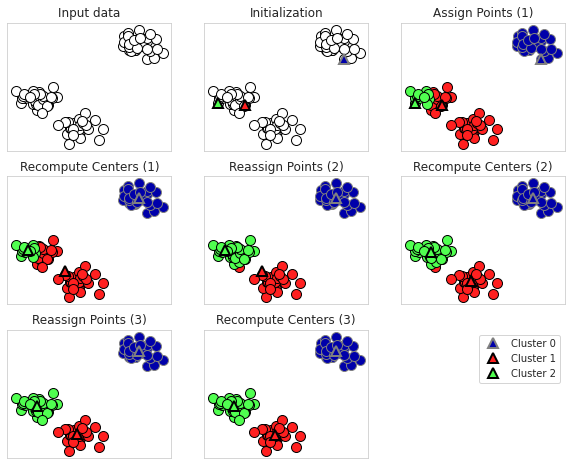

In [3]:
mglearn.plots.plot_kmeans_algorithm()

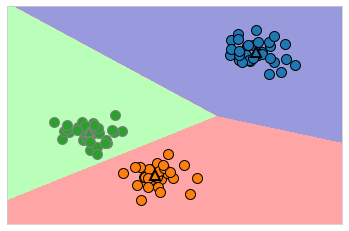

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state = 1)
print(X.shape)
print(y.shape)

kmeans = KMeans(n_clusters= 3)
kmeans.fit(X)
print(f"Cluster memberships:\n{kmeans.labels_}")
print(kmeans.predict(X))
print(np.all(kmeans.labels_ == kmeans.predict(X)))

(100, 2)
(100,)
Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]
True


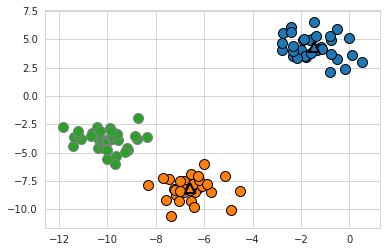

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, markers = "o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers = "^", markeredgewidth = 2)

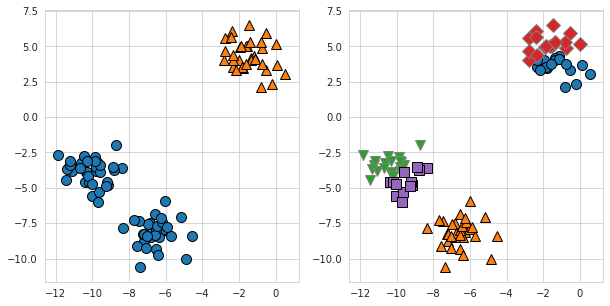

In [7]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax = axes[0])

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax = axes[1])

<h3>k-meansがうまくいかない場合</h3>

Text(0, 0.5, 'Feature 1')

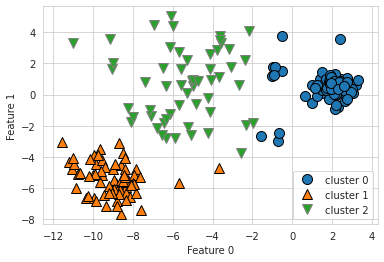

In [8]:
# 下記例だと、cluster0やcluster1の真ん中の方の点は、直感的には、cluster2に分類されそうではある
X_varied, y_varied = make_blobs(n_samples = 200, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"], loc = "best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

(600, 2)
(600,)
(600, 2)


Text(0, 0.5, 'Feature 1')

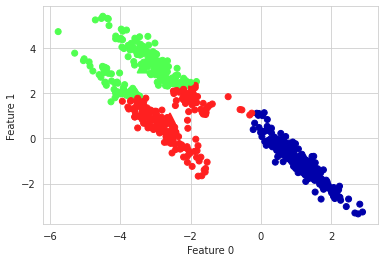

In [9]:
# 下記例は、対角線方向にデータが伸ばされているが、k-meansは最も近いクラスタセンタへの距離しか考慮しないので、
# このようなデータは取り扱えない
X, y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)
print(X.shape)
print(y.shape)
transformation = rng.normal(size = (2,2))
X = np.dot(X, transformation)
print(X.shape)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c = y_pred, cmap = mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker = "^", c = [0,1,2], s = 100, linewidth = 2, cmap = mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

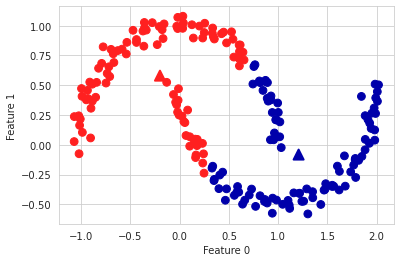

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1], c = y_pred, cmap = mglearn.cm2, s = 60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            marker = "^", c = [mglearn.cm2(0), mglearn.cm2(1)], s = 100, linewidth = 2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h3>ベクトル量子化、もしくは成分分解としてのk-means</h3>

In [11]:
# PCA,NMF,k-meansを抽出された成分で比較する
# さらに、100成分を用いた再構成画像も比較する。k-meansの再構成画像には、訓練セットから得られたクラスタセンタのうち最も近いものを用いる
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype = np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

In [12]:
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans

nmf = NMF(n_components = 100, random_state = 0).fit(X_train)
pca = PCA(n_components = 100, random_state = 0).fit(X_train)
kmeans = KMeans(n_clusters = 100, random_state = 0).fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
print(X_reconstructed_pca.shape)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
print(X_reconstructed_kmeans.shape)
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
print(nmf.components_.shape)
print(X_reconstructed_nmf.shape)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(516, 5655)
(516, 5655)
(100, 5655)
(516, 5655)


[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


Text(0, 0.5, 'nmf')

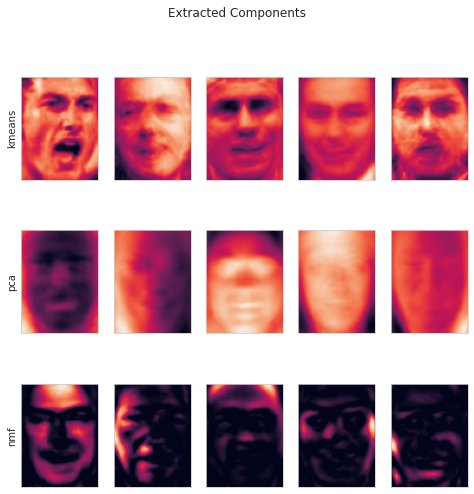

In [13]:
fig, axes = plt.subplots(3, 5, figsize = (8, 8), subplot_kw = {"xticks":(),"yticks":()})
fig.suptitle("Extracted Components")
print(axes.T)
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

Text(0, 0.5, 'nmf')

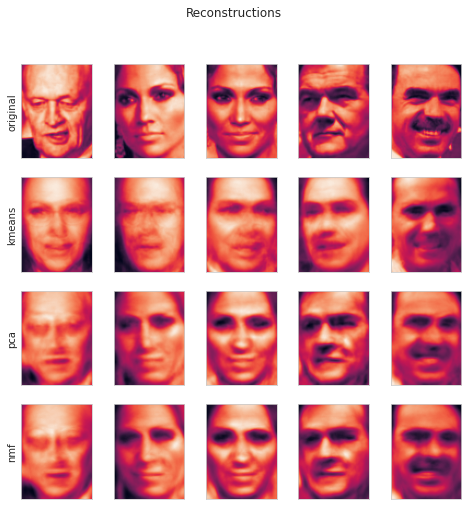

In [14]:
fig, axes = plt.subplots(4, 5, subplot_kw = {"xticks":(),"yticks":()}, figsize = (8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


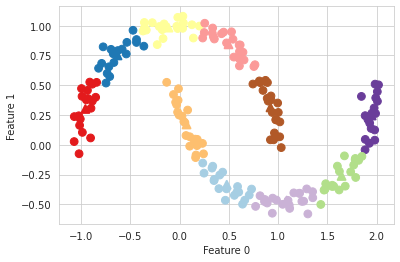

In [15]:
# 下記では10のクラスタセンタを用いている。これを、10成分でのデータ表現と考えることができる
# この10次元表現を使えば、この2つの半月型を線形モデルで分離できる
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
kmeans = KMeans(n_clusters = 10, random_state = 0).fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c = y_pred, s = 60, cmap = "Paired")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 60, marker = "^", c = range(kmeans.n_clusters), linewidth = 2, cmap = "Paired")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print(f"Cluster memberships:\n{y_pred}")

In [16]:
# transform()メソッド
print(X.shape)
distance_features = kmeans.transform(X)
print(f"Distance feature shape: {distance_features.shape}")
print(f"Distance features:\n{distance_features}")

(200, 2)
Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


<h3>最適なクラスタ数の見つけ方</h3>

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [18]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [19]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

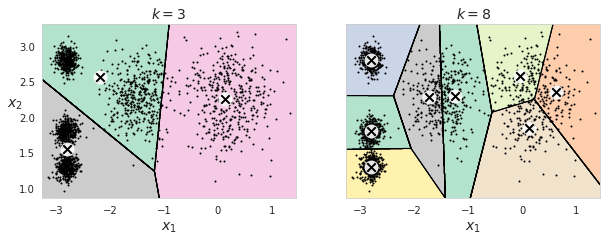

In [20]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [21]:
print(kmeans_k3.inertia_)
print(kmeans_k8.inertia_)

653.216719002155
119.11983416102879


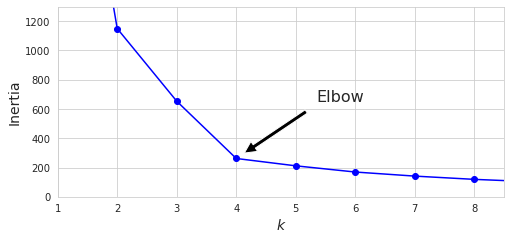

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

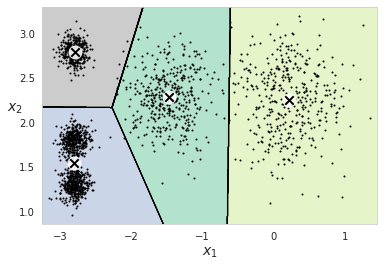

In [23]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)

0.688531617595759

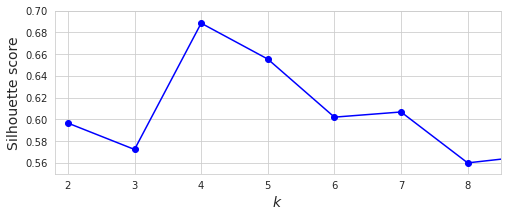

In [25]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

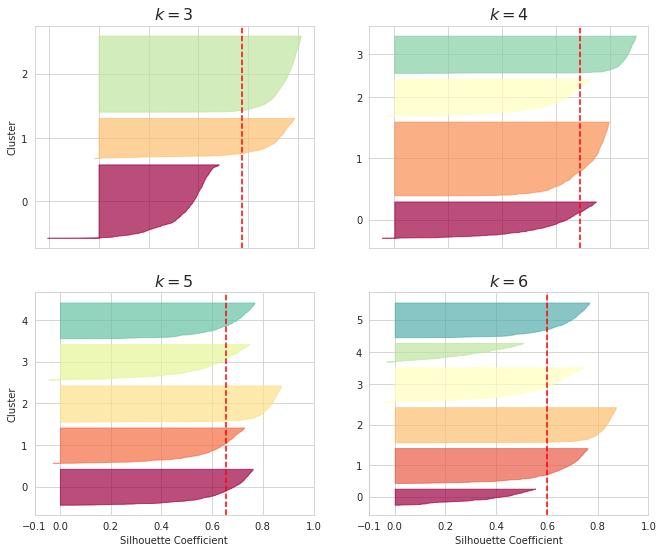

In [26]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## Using Clustering for Image Segmentation

In [27]:
from matplotlib.image import imread
import os

filename = os.path.join("image","ladybug.png")
image = imread(filename)
image.shape

(533, 800, 3)

In [28]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [29]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

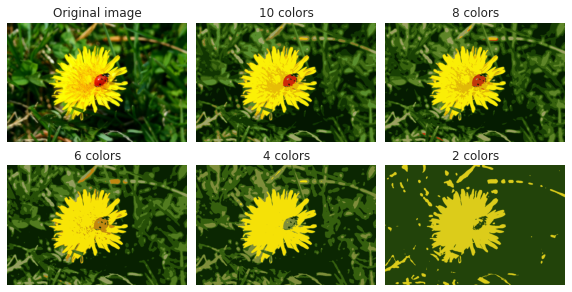

In [30]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Using Clustering for Preprocessing

Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [31]:
from sklearn.datasets import load_digits

In [32]:
X_digits, y_digits = load_digits(return_X_y=True)

Let's split it into a training set and a test set:

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Now let's fit a Logistic Regression model and evaluate it on the test set:

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [37]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

Okay, that's our baseline: 96.89% accuracy. Let's see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [40]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

How much did the error rate drop?

In [41]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

How about that? We reduced the error rate by over 35%! But we chose the number of clusters $k$ completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.

In [42]:
from sklearn.model_selection import GridSearchCV

**Warning**: the following cell may take close to 20 minutes to run, or more depending on your hardware.

In [43]:
param_grid = dict(kmeans__n_clusters=range(2, 30))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 30)}, verbose=2)

Let's see what the best number of clusters is:

In [44]:
grid_clf.best_params_

{'kmeans__n_clusters': 27}

In [45]:
grid_clf.score(X_test, y_test)

0.9711111111111111

## Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [46]:
n_labeled = 50

In [47]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [48]:
k = 50

In [49]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Now let's plot these representative images and label them manually:

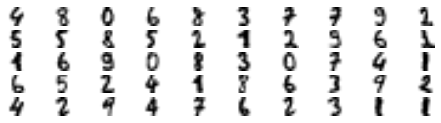

In [51]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [52]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [53]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 2, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [54]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.10444444444444445

Wow! We jumped from 83.3% accuracy to 91.3%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [55]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [56]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [57]:
log_reg.score(X_test, y_test)

0.14888888888888888

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 75th percentile closest to the centroid:

In [58]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [59]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [60]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [61]:
log_reg.score(X_test, y_test)

0.15777777777777777

A bit better. With just 50 labeled instances (just 5 examples per class on average!), we got 92.7% performance, which is getting closer to the performance of logistic regression on the fully labeled _digits_ dataset (which was 96.9%).

This is because the propagated labels are actually pretty good: their accuracy is close to 96%:

In [62]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.19541375872382852

<h1>DBSCAN（density-based spatial clustering of applications with noise）</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

<h4>概要</h4>
DBSCANの主な利点は、ユーザがクラスタ数を先験的に与える必要がないことと、どのクラスタにも属さない点を判別できることである<br>
DBSCANは、クラスタはデータ中で多くの点が近接し「混んでいる」領域を構成しており、比較的空虚な領域で区切られているという考えに基づく<br>
DBSCANには、<b>min_samples</b>と<b>eps</b>という2つのパラメータがある<br>
1.まず適当に1つのデータポイントを選び、そのデータポイントから距離eps以内にあるすべてのデータポイントを見つける<br>
2.その数がmin_samples以下であれば、その点はどのクラスタにも属さないノイズとなる<br>
3.その数がmin_samples以上であれば、その点はコアサンプルと呼ばれ、新しいクラスタラベルが割り当てられる<br>
4.3の次に、eps以内の全近傍点に対し、それらの点がまだクラスタに割り当てられていなければ、今作ったばかりの新しいクラスタラベルを割り当てる<br>
5.近傍点がコアサンプルであれば、その近傍点をさらにテストする。これをクラスタからeps以内にコアサンプルが存在しなくなるまで繰り返す<br>
6.5が終わると、まだ調べていない点を選んで、同じ手続きを繰り返す<br>
最終的には3種類のデータポイントができる。コアサンプル、コアサンプルから距離eps以内にあるデータポイント（境界ポイント）、ノイズ<br>
コアサンプルのクラスタリングとノイズになるデータポイントは、常に同じになる<br>
境界ポイントは、複数のクラスタに属するコアサンプルの近傍点である場合、テストされるデータポイントの順番によってクラスタが変わる可能性がある<br>
凝集型クラスタリングと同様に、DBSCANでも新しいテストデータに対する予測を行うことはできない

<h4>epsとmin_samplesの影響</h4>
epsを増やすと、より多くの点がクラスタに含まれるようになる。クラスタが大きくなるが、複数のクラスタが併合されることにもなる<br>
min_samplesを増やすと、コアサンプルになるデータポイントが少なくなり、より多くのデータポイントがノイズになる<br>
epsはデータポイントが「近い」ことの意味を決めるため、どちらかというとmin_samplesよりも重要だ<br>
min_samplesの設定は、密度の低い領域にあるデータポイントがノイズとなるが、独自のクラスタになるかに影響する<br>
従って、min_samplesは最小のクラスタのサイズを決定することになる<br>
DBSCANではクラスタの数を明示的に設定する必要はないが、epsの設定で暗黙にクラスタ数を制御することになる

<h4>スケール変換</h4>
良いepsの値を見つけるには、StandardScalerやMinMaxScalerでスケール変換してからの方が容易なことが多い
これらのスケール変換を行うと、全ての特徴量が同じ範囲になることが保証されるからだ

DBSCANのクラスタリング結果を別の配列のインデックスに使う場合は、ノイズを表す-1の取り扱いに注意が必要だ

In [63]:
# 下記例では、デフォルトのepsとmin_samplesが適していないため、全てノイズになってしまっている
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state = 0, n_samples = 12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(f"Cluster memberships:\n{clusters}")

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


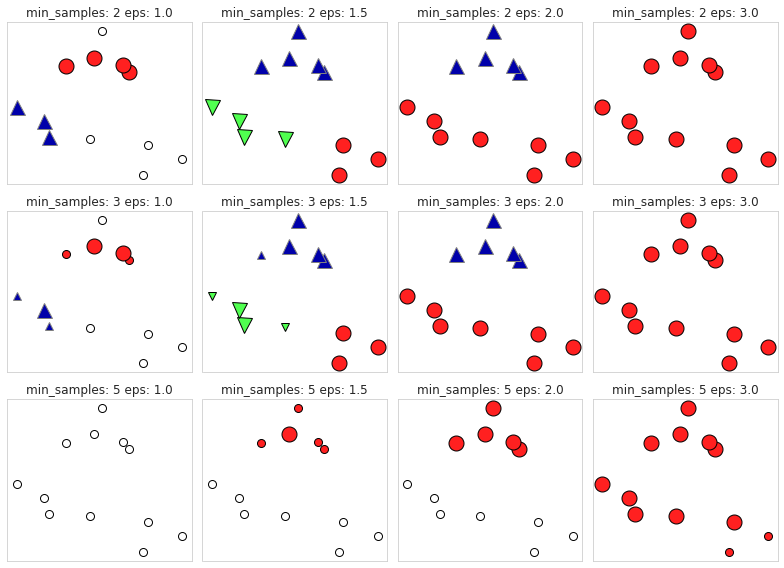

In [64]:
# epsとmin_samplesを色々と変えて結果を見てみる
mglearn.plots.plot_dbscan()

In [65]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

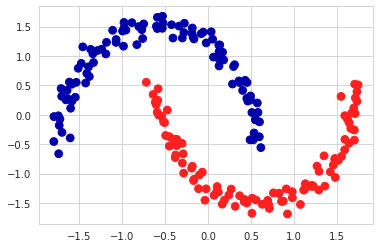

In [66]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters, cmap = mglearn.cm2, s = 60)

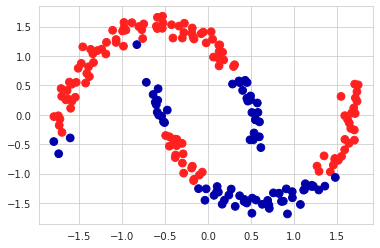

In [67]:
dbscan = DBSCAN(eps = 0.2)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters, cmap = mglearn.cm2, s = 60)

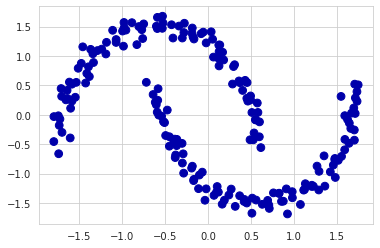

In [68]:
dbscan = DBSCAN(eps = 0.7)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters, cmap = mglearn.cm2, s = 60)